In [3]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [4]:
np.__version__, tf.__version__

('1.26.4', '2.16.1')

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [6]:
base = pd.read_csv("C:/Users/nanojau/OneDrive/Documentos/CURSOS/DeepLearningWithPythonUdemy/petr4_treinamento.csv")
base

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [7]:
base.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [8]:
base = base.dropna()

In [9]:
base.shape

(1242, 7)

In [10]:
base_treinamento = base.iloc[:, 1:2].values

In [11]:
base_treinamento

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [15.99    ],
       [16.1     ],
       [16.1     ]])

In [12]:
#Normalização dos dados
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
base_treinamento_normalizada

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

In [13]:
base_treinamento_normalizada.shape

(1242, 1)

In [14]:
X = [] #previsores
y = [] #preço real
for i in range(90, 1242): # preço real será previsot em relação aos 90 preços anteriores
    X.append(base_treinamento_normalizada[i - 90:i, 0])
    y.append(base_treinamento_normalizada[i, 0])
print(i, i-90)
X, y  = np.array(X), np.array(y)

1241 1151


In [15]:
X.shape

(1152, 90)

In [16]:
y.shape

(1152,)

In [17]:
X[0] , y[0]

(array([0.76501938, 0.7562984 , 0.78149225, 0.78875969, 0.77083338,
        0.74806197, 0.75436047, 0.75823643, 0.76598837, 0.76598837,
        0.76017437, 0.75872098, 0.75581391, 0.74467054, 0.7374031 ,
        0.7374031 , 0.73498067, 0.75242248, 0.73401163, 0.71656977,
        0.68120155, 0.67538755, 0.67635659, 0.63372098, 0.66521318,
        0.65649225, 0.64680228, 0.66618222, 0.65843028, 0.64970935,
        0.65116274, 0.66424419, 0.67344961, 0.64292631, 0.64486434,
        0.62257747, 0.60949617, 0.60998067, 0.60852713, 0.59593023,
        0.61143411, 0.60222863, 0.64922481, 0.68362398, 0.70687989,
        0.68265509, 0.70978682, 0.70784879, 0.71608527, 0.73643411,
        0.7122093 , 0.7122093 , 0.7194767 , 0.70348832, 0.69525189,
        0.70397287, 0.70397287, 0.69767442, 0.68168605, 0.68168605,
        0.65310078, 0.66618222, 0.64825581, 0.66182175, 0.64341085,
        0.67877902, 0.69137592, 0.66569772, 0.65406982, 0.64292631,
        0.64147292, 0.63565891, 0.67587209, 0.68

In [18]:
regressor = Sequential()

regressor.add(LSTM(units = 100, return_sequences=True, input_shape = (X.shape[1], 1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.summary()

C:\Users\nanojau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 90, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 90, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 90, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 90, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,451 (435.36 KB)

 Trainable params: 111,451 (435.36 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
regressor.compile(optimizer='rmsprop', loss = 'mean_squared_error',metrics = ['mean_absolute_error'])

In [20]:
regressor.fit(X, y , epochs= 100, batch_size= 32)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - loss: 0.0532 - mean_absolute_error: 0.1687
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.0185 - mean_absolute_error: 0.1075
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 0.0150 - mean_absolute_error: 0.0958
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - loss: 0.0116 - mean_absolute_error: 0.0822
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0108 - mean_absolute_error: 0.0819
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 0.0093 - mean_absolute_error: 0.0746
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0092 - mean_absolute_error: 0.0748
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.0086 - mean_absolute_error: 0.0701
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0101 - mean_absolute_error: 0.0759
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0071 - mean_absolute_error: 0.0639
Epoch 11/100
36/36 

In [47]:
base_teste = pd.read_csv("C:/Users/nanojau/OneDrive/Documentos/CURSOS/DeepLearningWithPythonUdemy/petr4_teste.csv")
base_teste

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900
3,2018-01-05,16.700001,16.860001,16.570000,16.830000,16.796408,26958200
4,2018-01-08,16.740000,17.030001,16.709999,17.030001,16.996010,28400000
5,2018-01-09,17.030001,17.160000,16.959999,17.030001,16.996010,35070900
6,2018-01-10,16.920000,17.049999,16.770000,16.799999,16.766466,28547700
7,2018-01-11,16.879999,17.299999,16.840000,17.250000,17.215569,37921500
8,2018-01-12,17.040001,17.410000,17.020000,17.299999,17.265469,45912100
9,2018-01-15,17.320000,17.440001,17.150000,17.350000,17.315371,28945400


In [65]:
base_teste.shape

(22, 7)

In [48]:
y_teste = base_teste.iloc[:, 1:2].values

In [49]:
y_teste

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [50]:
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)

In [51]:
base_completa.shape

(1264,)

In [52]:
base_completa[1152:]

1155    13.930000
1156    13.760000
1157    13.790000
1158    13.530000
1159    13.850000
          ...    
17      19.340000
18      19.620001
19      19.670000
20      19.770000
21      19.740000
Name: Open, Length: 112, dtype: float64

In [53]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values

In [54]:
entradas.shape

(112,)

In [55]:
entradas = entradas.reshape(-1, 1)
entradas.shape

(112, 1)

In [56]:
entradas

array([[13.93    ],
       [13.76    ],
       [13.79    ],
       [13.53    ],
       [13.85    ],
       [13.96    ],
       [14.57    ],
       [14.65    ],
       [15.02    ],
       [15.1     ],
       [14.88    ],
       [14.98    ],
       [14.94    ],
       [15.03    ],
       [15.07    ],
       [15.02    ],
       [15.1     ],
       [15.25    ],
       [15.85    ],
       [15.6     ],
       [15.79    ],
       [15.86    ],
       [15.7     ],
       [15.37    ],
       [15.5     ],
       [15.19    ],
       [15.6     ],
       [15.9     ],
       [15.88    ],
       [15.66    ],
       [15.61    ],
       [16.129999],
       [16.17    ],
       [16.08    ],
       [16.23    ],
       [16.16    ],
       [16.139999],
       [16.219999],
       [16.      ],
       [16.190001],
       [16.290001],
       [16.290001],
       [16.530001],
       [16.780001],
       [16.77    ],
       [16.969999],
       [16.9     ],
       [16.99    ],
       [16.9     ],
       [16.959999],


In [57]:
entradas = normalizador.transform(entradas)

In [66]:
X_teste = []
for i in range(90, 112):
    X_teste.append(entradas[i -90:i, 0])

In [67]:
X_teste

[array([0.47141473, 0.46317829, 0.46463178, 0.45203488, 0.46753876,
        0.47286822, 0.50242248, 0.50629845, 0.52422481, 0.52810078,
        0.51744186, 0.52228682, 0.52034884, 0.5247093 , 0.52664729,
        0.52422481, 0.52810078, 0.53536822, 0.56443798, 0.55232558,
        0.56153101, 0.56492248, 0.55717054, 0.54118217, 0.54748062,
        0.53246124, 0.55232558, 0.56686047, 0.56589147, 0.55523256,
        0.55281008, 0.57800383, 0.57994186, 0.5755814 , 0.58284884,
        0.57945736, 0.57848832, 0.58236429, 0.57170543, 0.5809109 ,
        0.58575586, 0.58575586, 0.59738377, 0.60949617, 0.60901163,
        0.6187015 , 0.61531008, 0.61967054, 0.61531008, 0.61821701,
        0.62257747, 0.63517437, 0.60513571, 0.61482553, 0.6061046 ,
        0.60513571, 0.60271313, 0.54021318, 0.55329457, 0.56782946,
        0.57267442, 0.57897287, 0.57606589, 0.57073643, 0.58381783,
        0.57218992, 0.56831395, 0.56540698, 0.5377907 , 0.53972868,
        0.55474806, 0.54748062, 0.53391473, 0.53

In [68]:
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

In [69]:
X_teste.shape

(22, 90, 1)

In [70]:
previsoes = regressor.predict(X_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


In [71]:
previsoes

array([[0.54724896],
       [0.5513229 ],
       [0.55577874],
       [0.56232786],
       [0.56925917],
       [0.574956  ],
       [0.58040607],
       [0.5846715 ],
       [0.58688486],
       [0.58819747],
       [0.5909748 ],
       [0.59526426],
       [0.60341656],
       [0.6165094 ],
       [0.6309349 ],
       [0.64251137],
       [0.6502293 ],
       [0.6543585 ],
       [0.66152143],
       [0.6736771 ],
       [0.6878545 ],
       [0.7007361 ]], dtype=float32)

In [72]:
previsoes = normalizador.inverse_transform(previsoes)

In [73]:
y_teste

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [74]:
previsoes.mean()    

16.780119

In [75]:
y_teste.mean()

17.87454563636364

In [76]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_teste, previsoes)

1.0944268674982245

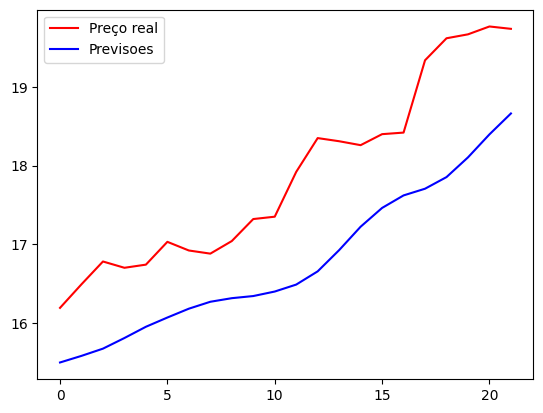

In [77]:
plt.plot(y_teste, color = "red", label = "Preço real")
plt.plot(previsoes, color = "blue", label = "Previsoes")
plt.legend();